# Chapter 1 - Classification

## k-Nearest Neighbors Classification

### Train a KNN model and predict labels of new data points

In [1]:
# Import dependencies
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [2]:
# Load data
churn_df = pd.read_csv('./datasets/telecom_churn_clean.csv', index_col=[0])

In [3]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

In [5]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [6]:
# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [7]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [8]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

In [9]:
# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


The first and third customers were predicted to not churn.

### Train/test split and computing accuracy

In [10]:
# Import dependencies
from sklearn.model_selection import train_test_split

In [11]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

In [12]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


We get an accuracy of 87%.

### Overfitting and underfitting

In [15]:
# Import dependencies
import matplotlib.pyplot as plt

In [16]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

In [17]:
for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

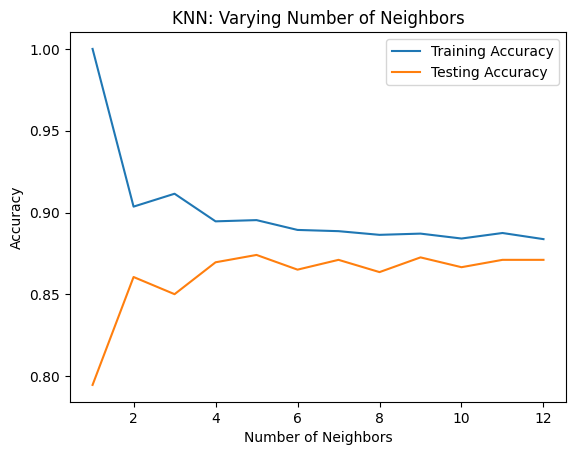

In [18]:
# Visualise model complexity
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

Training accuracy decreases as the number of neighbors gets larger (and vice versa for test accuracy).

For the test set, accuracy peaks with 7 neighbors suggesting it is the optimal value for our model.